In [2]:
import numpy as np

## Iris Dataset

이번 실습은 붓꽃(iris, 아이리스) 데이터를 활용하여 붓꽃의 세부 종류를 구분하는 문제를 풉니다.

붓꽃의 종류는 크게 **iris setosa** / **iris versicolor** / **iris virginica**가 존재하며, 주어진 꽃잎과 꽃받침의 길이와 너비를 활용해 해당 꽃의 종류를 맞추는 알고리즘을 Single-layer Neural Network로 해결하면 됩니다.

각 컬럼에 대한 설명은 다음과 같습니다. 출처: [ai-times](http://ai-times.tistory.com/418)

  * **sepal length (cm)**: 꽃받침의 길이
  * **sepal width (cm)**: 꽃받침의 너비
  * **petal length (cm)**: 꽃잎의 길이
  * **petal width (cm)**: 꽃잎의 너비
  * **species**: 붓꽃의 종류. iris setosa(0) / iris versicolor(1) / iris virginica(2) 의 세 종류가 있다.

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

In [5]:
X = iris["data"]

print(X.shape)
X[0:5]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
y = iris["target"]

print(y.shape)
y[0:10]

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
data = pd.DataFrame(X, columns=iris["feature_names"])
data["species"] = y

num_species = len(data["species"].unique())

print("The total number of species = {0}".format(num_species))

print(data.shape)
data.head()

The total number of species = 3
(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualize

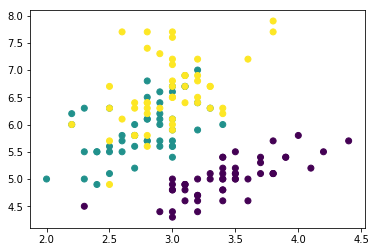

In [7]:
plt.scatter(data["sepal width (cm)"], data["sepal length (cm)"], c=data["species"])

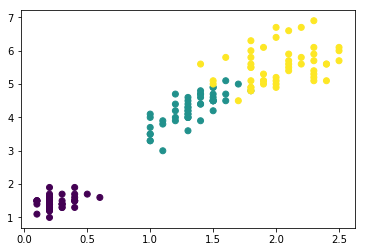

In [8]:
plt.scatter(data["petal width (cm)"], data["petal length (cm)"], c=data["species"])

### Preprocessing

In [17]:
num_species = len(np.unique(y))

y_hot = np.eye(num_species)[y]

print(y_hot.shape)
y_hot[0:10]

(150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### Define Sigmoid

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [19]:
xx = np.linspace(-10, 10)
yy = sigmoid(xx)

plt.plot(xx, yy)

NameError: name 'plt' is not defined

### Gradient Descent

In [23]:
import pandas as pd
import numpy as np

num_epoch = 100
learning_rate = 0.003

w = np.random.uniform(low = -1.0, high = +1.0, size = (4, 3))
b = np.random.uniform(low = -1.0, high = +1.0, size = (1, 3))

for epoch in range(num_epoch):
    y_predict_hot = X.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    y_predict = y_predict_hot.argmax(axis=1)
    accuracy = (y_predict == y).mean()
    if accuracy > 0.95:
        break
        
    if epoch % 10 == 0:
        print("{0:2} accuracy = {1:.6f}".format(epoch, accuracy))
        
    w = w - learning_rate * X.T.dot(y_predict_hot - y_hot)
    b = b - learning_rate * (y_predict_hot - y_hot).mean(axis=0)
    
print("------" * 10)

print("{0:2} accuracy = {1:.6f}".format(epoch, accuracy))
    

 0 accuracy = 0.666667
10 accuracy = 0.660000
20 accuracy = 0.780000
30 accuracy = 0.666667
40 accuracy = 0.680000
50 accuracy = 0.666667
60 accuracy = 0.666667
70 accuracy = 0.666667
------------------------------------------------------------
76 accuracy = 0.960000
